## U-Net training for image segmentation

**==============================================================================================================**
### ISBI Dataset
**==============================================================================================================**

In [ ]:
import pyeddl.eddl as eddl
from pyeddl.tensor import Tensor

#### Load data

In [ ]:
ISBI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/datasets/isbi/'

In [ ]:
imgs_path = [ISBI_PATH + 'train/image_lq/'+str(i)+'.png' for i in range(30)]
masks_path= [ISBI_PATH + 'train/label_lq/'+str(i)+'.png' for i in range(30)]

In [ ]:
train_imgs = Tensor.fromarray([Tensor.load(img).getdata()          for img in imgs_path])
train_masks= Tensor.fromarray([Tensor.load(msk).div(255).getdata() for msk in masks_path])

#### Create model

In [ ]:
from unet import unet

In [ ]:
# RuntimeError: Error allocating 288.00MB in ConvolDescriptor::build
#
# Solution 1:   https://stackoverflow.com/questions/57948003/how-to-increase-jupyter-notebook-memory-limit
# Solution 2:   Reduce image quality and shape to 256x256
net = unet(eddl.Input([1, 256, 256]))

In [ ]:
# Model build
eddl.build(
    net,
    eddl.nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, schedule_decay=0.004), 
    ["binary_cross_entropy"],
    ["dice"],
    eddl.CS_CPU(mem="low_mem")
)

In [ ]:
eddl.setlogfile(net, "unet.log")
eddl.summary(net)

In [ ]:
# Kernel dies when trying to execute this
# - Option 1: Lack of power of my computer
# - Option 2: Error in the model
#
# - Solution: Move code to .py and run both in the computer and the server
eddl.fit(net, [train_imgs], [train_masks], 2, 5)

**===============================================================================================================**

#### Data preprocessing

Dealing with 512$\times$512 images requires too much memory for creating and training our model. In this first part, we are reducing image size to 256$\times$256

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
ISBI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/datasets/isbi/'

In [ ]:
train_imgs = [ISBI_PATH + 'train/image/'+str(i)+'.png' for i in range(30)]
train_masks= [ISBI_PATH + 'train/label/'+str(i)+'.png' for i in range(30)]

In [ ]:
for i in range(30):
    image_input  = ISBI_PATH + 'train/image/'     + str(i) + '.png'
    mask_input   = ISBI_PATH + 'train/label/'     + str(i) + '.png'
    image_output = ISBI_PATH + 'train/image_lq/' + str(i) + '.png'
    mask_output  = ISBI_PATH + 'train/label_lq/' + str(i) + '.png'
    
    img = Image.open(image_input)
    msk = Image.open(mask_input)
    
    img = img.resize((img.size[0]//2, img.size[1]//2))
    msk = msk.resize((msk.size[0]//2, msk.size[1]//2))
    
    img = img.save(image_output)
    msk = msk.save(mask_output)

#### Load data (attempt 1)

In [ ]:
ISBI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/datasets/isbi/'

In [ ]:
train_imgs = [ISBI_PATH + 'train/image_lq/'+str(i)+'.png' for i in range(30)]
train_masks= [ISBI_PATH + 'train/label_lq/'+str(i)+'.png' for i in range(30)]

In [ ]:
# Tensor.load(train_imgs[7])
# Tensor.load(train_masks[2])

In [ ]:
train_data  = [Tensor.load(img)            for img in train_imgs ] 
train_masks = [Tensor.load(msk).div(255.0) for msk in train_masks]

In [ ]:
# Tensor.getdata(train_data[0])
# Tensor.getdata(train_masks[0])

#### Load data (attempt 2)

In [ ]:
ISBI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/datasets/isbi/'

In [ ]:
train_imgs = [ISBI_PATH + 'train/image_lq/'+str(i)+'.png' for i in range(30)]
train_masks= [ISBI_PATH + 'train/label_lq/'+str(i)+'.png' for i in range(30)]

In [ ]:
imgs_nparray = [Tensor.load(img).getdata()            for img in train_imgs]
masks_nparray= [Tensor.load(msk).div(255.0).getdata() for msk in train_masks]

In [ ]:
train_data = Tensor.fromarray(imgs_nparray)
train_masks= Tensor.fromarray(masks_nparray)

**==============================================================================================================**
### MICCAI2016 Dataset
**==============================================================================================================**

In [1]:
import pyeddl.eddl as eddl
from pyeddl.tensor import Tensor

In [2]:
import numpy   as np
import nibabel as nib
import matplotlib.pyplot as plt

#### Load data

In [3]:
MICCAI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/datasets/miccai2016/'

In [4]:
imgs_path = [MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii' for i in range(1,13)]
masks_path= [MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'           for i in range(1,13)]

In [ ]:
imgs_np = [np.array(nib.load(img).get_fdata()[:,:,300]) for img in imgs_path]
msks_np = [np.array(nib.load(msk).get_fdata()[:,:,300]) for msk in masks_path]
msks_np = [msk/msk.max() for msk in msks_np]

In [ ]:
train_imgs = Tensor.fromarray(imgs_np)
train_masks= Tensor.fromarray(msks_np)

**===============================================================================================================**

#### Some dataset exploration, [Ref](https://dev.to/narendraanupoju/mri-data-processing-with-python-1jgg)

In [6]:
data = nib.load(imgs_path[0])
image_data = data.get_fdata()
image_data.shape

(144, 512, 512)

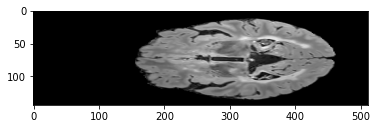

In [20]:
plt.imshow(image_data[:,:,300], cmap="gray")

In [11]:
mask = nib.load(masks_path[0])
mask_data = mask.get_fdata()
mask_data.shape

(144, 512, 512)

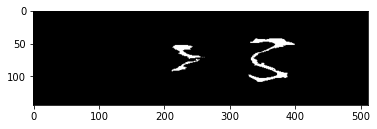

In [14]:
plt.imshow(mask_data[:,:,320], cmap="gray")

In [ ]:
data = nib.load(imgs_path[0])
image_data = data.get_fdata()
image_data.shape

In [ ]:
plt.imshow(image_data[70,:,:], cmap="gray")

In [ ]:
plt.imshow(image_data[80,:,:], cmap="gray")

In [ ]:
plt.imshow(image_data[90,:,:], cmap="gray")

In [ ]:
plt.imshow(mask_data[90,:,:], cmap="gray")

In [ ]:
data = nib.load(imgs_path[0])
mask = nib.load(masks_path[0])

In [ ]:
mask.get_fdata().shape

#### Slice data and save binary (attempt 1)

In [2]:
MICCAI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/datasets/miccai2016/'

In [23]:
train_imgs_path = [MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii' for i in range(1,13)]
train_masks_path= [MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'           for i in range(1,13)]

In [4]:
test_imgs_path = [MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii' for i in range(13,16)]
test_masks_path= [MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'           for i in range(13,16)]

In [20]:
#img = nib.load(train_imgs_path[0])
#img_array = np.array(img.dataobj)
#img_array[:,:,300].shape

In [26]:
# No funciona porque tienen diferente dimensión!
#train_imgs_np = [np.array(nib.load(img).dataobj)[:,:,300] for img in train_imgs_path]
#train_msks_np = [np.array(nib.load(msk).dataobj)[:,:,300] for msk in train_masks_path]
#train_msks_np = [msk/msk.max() for msk in train_msks_np]

In [25]:
for i in range(1,16):
    IMG_PATH = MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii'
    MSK_PATH = MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'
    
    img = nib.load(IMG_PATH)
    msk = nib.load(MSK_PATH)
    
    print(i)
    print(np.array(img.dataobj).shape)
    print(np.array(msk.dataobj).shape)

1
(144, 512, 512)
(144, 512, 512)
2
(144, 512, 512)
(144, 512, 512)
3
(144, 512, 512)
(144, 512, 512)
4
(144, 512, 512)
(144, 512, 512)
5
(144, 512, 512)
(144, 512, 512)
6
(128, 224, 256)
(128, 224, 256)
7
(128, 224, 256)
(128, 224, 256)
8
(128, 224, 256)
(128, 224, 256)
9
(128, 224, 256)
(128, 224, 256)
10
(128, 224, 256)
(128, 224, 256)
11
(261, 336, 336)
(261, 336, 336)
12
(261, 336, 336)
(261, 336, 336)
13
(261, 336, 336)
(261, 336, 336)
14
(261, 336, 336)
(261, 336, 336)
15
(261, 336, 336)
(261, 336, 336)


#### Visualization of different MRIs

In [28]:
imgs_path = [MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii' for i in range(1,16)]
masks_path= [MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'           for i in range(1,16)]

In [238]:
IMG = 0
SLICE = 350

In [239]:
data = nib.load(imgs_path[IMG])
image_data = data.get_fdata()

In [240]:
mask = nib.load(masks_path[IMG])
mask_data = mask.get_fdata()

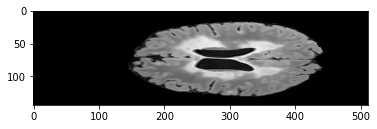

In [241]:
plt.imshow(image_data[:,:,SLICE], cmap="gray")

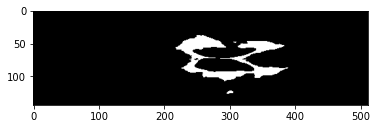

In [242]:
plt.imshow(mask_data[:,:,SLICE], cmap="gray")

In [244]:
slices = [350,350,350,350,300,180,180,180,140,160,220,220,250,250,240]

In [245]:
for i in range(1,16):
    IMG_PATH = MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii'
    MSK_PATH = MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'
    
    img = nib.load(IMG_PATH)
    msk = nib.load(MSK_PATH)
    
    print(i-1)
    print(np.array(img.dataobj)[:,:,slices[i-1]].shape)
    print(np.array(msk.dataobj)[:,:,slices[i-1]].shape)

0
(144, 512)
(144, 512)
1
(144, 512)
(144, 512)
2
(144, 512)
(144, 512)
3
(144, 512)
(144, 512)
4
(144, 512)
(144, 512)
5
(128, 224)
(128, 224)
6
(128, 224)
(128, 224)
7
(128, 224)
(128, 224)
8
(128, 224)
(128, 224)
9
(128, 224)
(128, 224)
10
(261, 336)
(261, 336)
11
(261, 336)
(261, 336)
12
(261, 336)
(261, 336)
13
(261, 336)
(261, 336)
14
(261, 336)
(261, 336)
